# <img src="https://www.pngall.com/wp-content/uploads/11/Harbor-Seal-Vector-PNG-Pic.png" width="120"> <u>**ICE WALKER SEAL : Quand le HTML rencontre Python**</u>
>[**PyScript**](https://pyscript.net/) | [**WebAssembly**](https://pyodide.org/en/stable/)

**Marcher sur la glace est un exercice périlleux même pour un phoque :**

On ne peut pas changer de direction, il est difficile de s’arrêter.

Dans ce projet, nous allons nous intéresser à la programmation d’un jeu dans lequel le joueur incarnera un phoque se déplaçant sur la glace et cherchant à atteindre la case avec le poisson pour pouvoir se nourrir.

**Le terrain est** : Un labyrinthe rectangulaire entièrement constitué de cases gelées, à l’exception d’une seule case où se trouve un poisson. Toutefois un mur peut être placé sur un segment adjacent à deux cases (*On utilisera seulement les positions Est et Sud pour positionner ces murs*). <u>Entouré de murs</u>.

À chaque étape du jeu, le joueur choisit une direction parmi quatre (Nord, Sud, Est, Ouest) pour déplacer le phoque.

Ce dernier se déplace alors dans la direction choisie en ligne droite jusqu’à rencontrer un obstacle.

**Le jeu se fini lorsque :**

+ le phoque est arrivé sur la case où se trouve le poisson pour enfin se nourrir;

+ il abandonne la partie car il n’est parfois plus possible de rejoindre la case avec le poisson si une mauvaise direction a été prise.

>**La structure du projet Ice Walker Seal**

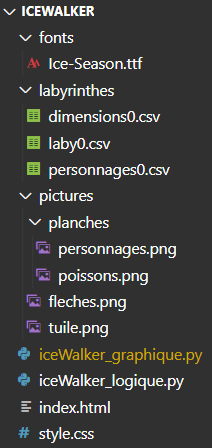



---



---



---



> $\color{#60b5c2}{\textrm{Les instructions à suivre pour réaliser le projet Ice Walker Seal.}}$


+ **En fin de document les images utiles pour la partie graphique du jeu.**
+ **Il faudra reconstituer la structure du projet(et produire le code nécessaire à la réalisation du jeu) ci-dessus et répondre aux questions <img src="https://cdn.pixabay.com/photo/2012/04/12/13/26/question-30028_1280.png" width="20"> qui nécéssitent un travail de rédaction dans un fichier ``iceWalkerSea.docx``, qu'il vous appartiendra de rendre agréable à la lecture.**
+ [**La police de caractères Ice Season**](https://www.dafont.com/fr/search.php?q=ice+season)



---

---





---



## <img src="https://cdn.pixabay.com/photo/2015/12/07/21/52/harbor-1081482_960_720.png" width="60"> **<u>La logique du ICE WALKER SEAL</u>**

### <img src="https://cdn-icons-png.flaticon.com/512/3593/3593422.png" width="25"> **Les données du labyrinthe : Les murs internes(fichier ``laby0.csv`` sans les murs d'enceinte)**

abscisse, ordonnée, orientation
```csv
0,1,S
0,5,E
0,9,N
0,9,S
2,5,S
2,6,S
3,4,S
3,4,E
3,6,E
4,4,E
4,6,E
9,6,E
```


**Le fichier ``laby0.csv`` est traité par la fonction ``labyrinthe`` du fichier ``iceWalker_logique.py``**

In [ ]:
import csv

def labyrinthe(fichier: str) -> list:    
    dico_murs = {}
    with open(fichier, 'r') as donnees:
        # Lire les informations données pour cette variable ci-dessous. 
        murs = csv.reader(donnees)       
        for mur in murs:      
           if (int(mur[0]), int(mur[1])) in dico_murs.keys():
                dico_murs[(int(mur[0]), int(mur[1]))].append(mur[2])
           else:
               dico_murs[(int(mur[0]), int(mur[1]))] = [mur[2]]
    return dico_murs 
    # Lire ci-dessous les informations données sur l'objet renvoyé.

Les données référencées par la variable murs est de type ``csv.reader``.
Chaque ligne du fichier csv est représentée par une liste.
        
        ['0', '1', 'S'] 
        ['0', '5', 'E'] 
        ['0', '9', 'S'] 
        ['2', '5', 'S']
        ['2', '6', 'S'] 
        ['3', '4', 'S'] 
        ['3', '4', 'E'] 
        ['3', '6', 'E'] 
        ['4', '4', 'E'] 
        ['4', '6', 'E']
        ['9', '6', 'E']

 L'objet renvoyé par la fonction ``labyrinthe`` sera un dictionnaire dont les clés sont des tuples représentants les coordonnées de la case et les valeurs des listes contenant l'orientation des murs de la case.
 ```python
    {
        (0, 1): ['S'], 
        (0, 5): ['E'], 
        (0, 9): ['S'], 
        (2, 5): ['S'], 
        (2, 6): ['S'], 
        (3, 4): ['S', 'E'], 
        (3, 6): ['E'], 
        (4, 4): ['E'], 
        (4, 6): ['E'], 
        (9, 6): ['E']
    } 
```   

<img src="https://cdn.pixabay.com/photo/2012/04/12/13/26/question-30028_1280.png" width="30"> **A l'appel de la fonction ``labyrinthe`` expliquer comment a été traité la ligne ``3,6,E`` du fichier ``laby0.csv``.**

### <img src="https://www.pngmart.com/files/14/2-Number-Download-PNG-Image.png" width="20"> **Traiter les sprites du jeu**

Dans cette version simplifiée du jeu nous avons deux personnages à considérer, le phoque et le poisson. Le phoque est à pour identifiant ``'0'`` et le poisson ``'1'``.

```python
    # Le contenu du fichier csv(str)
    3,4,0
    0,9,1
    
    # L'objet renvoyé par la fonction personnages
    {
        '0': (3, 4), 
        '1': (0, 9)
    }
```

<img src="https://cdn.pixabay.com/photo/2012/04/12/13/26/question-30028_1280.png" width="30"> **Compléter la fonction ``personnages`` en considérant les informations données ci-dessus.**

In [ ]:
def personnages(fichier: str) -> list:
    
    dico_personnages = ...
    with open(fichier, 'r') as donnees:
        personnages = csv.reader(donnees, delimiter=',')
        for personnage in personnages:
           dico_personnages[personnage[2]] = (..., ...)
    return ...

### <img src="https://www.pngarts.com/files/3/Number-3-Transparent-Images.png" width="25"> **Les dimensions du monde glacé du phoque.**

<img src="https://cdn.pixabay.com/photo/2012/04/12/13/26/question-30028_1280.png" width="30"> **Compléter la fonction ``dimensions`` en considérant les informations données en doc-string.**

In [ ]:
def dimensions(fichier_dimensions: str) -> tuple:
    '''
    On dispose d'un fichier dimensions0.csv, dont le contenu est
    10,10

    La fonction dimensions doit traité ce fichier pour renvoyer
    l'objet (10, 10) dont les élèment de ce tuple sont des entiers.      
    '''

### <img src="https://www.pngarts.com/files/3/4-Number-Transparent-Image.png" width="25"> **Traitement du déplacement du phoque.**

Cette fonction ``mouvement`` permet de renvoyer ``True`` si le phoque peut se déplacer d'une case dans la direction choisie, False dans la cas contraire.

Si le phoque peut se déplacer, sa position est mise à jour dans ``dico_personnages`` qui est le dictionnaire renvoyé par la fonction ``personnages``.

In [ ]:
def mouvement(dico_personnages: dict, dico_murs: dict, direction: str, dimension: tuple) -> bool:

    if direction == 'S' and dico_personnages['0'][0] < dimension[0] - 1:
        if dico_personnages['0'] not in dico_murs.keys() or 'S' not in dico_murs[dico_personnages['0']] :
            dico_personnages['0'] = (dico_personnages['0'][0] + 1, dico_personnages['0'][1])
            return True
    '''
    Le code a réaliser ici permet de traiter le déplacement du phoque vers la droite : 'E'
    Le traitement s'inspire de celui réalisé pour le déplacement vers le bas : 'S'
    '''
    elif direction == 'N' and dico_personnages['0'][0] > 0:
        case_au_dessus = dico_personnages['0'][0] - 1, dico_personnages['0'][1]
        if case_au_dessus not in dico_murs.keys() or 'S' not in dico_murs[case_au_dessus] :
            dico_personnages['0'] = (dico_personnages['0'][0] - 1 , dico_personnages['0'][1])
            return True
    '''
    Le code à réaliser ici permet de traiter le déplacement du phoque vers la gauche : 'O'
    Le traitement s'inspire de celui réalisé pour le déplacement vers le haut : 'N'
    '''

    return ...

<img src="https://cdn.pixabay.com/photo/2012/04/12/13/26/question-30028_1280.png" width="30"> **Préciser le rôle des paramètres de la fonction ``mouvement``. Ensuite complète le code pour que la fonction puisse remplir la tâche qui lui est dévolue.**

### <img src="https://cdn-icons-png.flaticon.com/512/3593/3593510.png" width="25"> **Le phoque mange le poisson.**

<img src="https://cdn.pixabay.com/photo/2012/04/12/13/26/question-30028_1280.png" width="30"> **Ecrire une fonction ``gagne(dico_personnages: dict) -> bool`` qui renvoie ``True`` si le phoque est à la même position que le poisson et ``False`` dans le cas contraire.**



---



---



---



## <img src="https://cdn.pixabay.com/photo/2015/12/07/21/52/harbor-1081482_960_720.png" width="60"> **<u>L'interface graphique du ICE WALKER SEAL</u>**

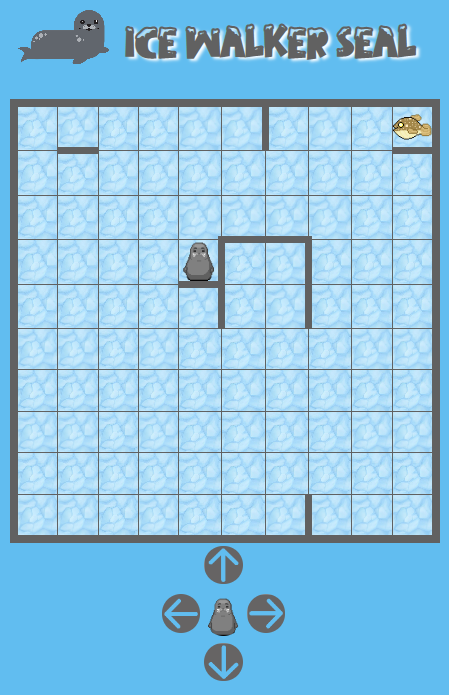

### <img src="https://cdn-icons-png.flaticon.com/512/3593/3593422.png" width="25"> Le fichier ``iceWalker_graphique.py``

In [ ]:
# La bibliothèque js permet d'utiliser des fonctions qui permettent d'interagir
# avec les éléments du DOM.
from js import document
from iceWalker_logique import labyrinthe, personnages, mouvement, gagne, dimensions
# Bibliothèques utiles pour le traitement de l'image
from PIL import Image
import base64
from io import BytesIO

<img src="https://cdn.pixabay.com/photo/2012/04/12/13/26/question-30028_1280.png" width="30"> **On réalise l'appel suivant : ``grille_iceWalker(5, 5)``. Donner la structure HTML qui sera injectée dans l'élément ``div`` dont l'identifiant(``id``) est ``"plateauJeu"``.**

In [ ]:
def grille_iceWalker(nb_ligne: int = 10, nb_colonne: int = 10) -> None:
    '''
    Création d'un élément HTML table, par défaut un tableau de 10 lignes
    et 10 colonnes sera injecté dans la page index.html.    
    '''
    plateauJeu = document.getElementById("plateauJeu")
    table = document.createElement("table")
    table.id = "grille"
    for i in range(nb_ligne):
        tr = document.createElement("tr")
        tr.id = f'ligne{i}'
        for j in range(nb_colonne):
            td = document.createElement("td")
            td.id = f'cellule{i}_{j}'
            tr.appendChild(td)
        table.appendChild(tr)
    plateauJeu.appendChild(table)

<img src="https://cdn.pixabay.com/photo/2012/04/12/13/26/question-30028_1280.png" width="30"> **La fonction ``mur_enceinte`` permet de construire une bordure sur l'élément ``table`` qui a été injecté dans l'élément ``div`` dont l'id est ``"plateauJeu"``. La méthode ``getElementByTagName`` de la bibliothèque ``js`` permet de créer une liste contenant les objets dont le nom de balise lui a été passé en paramètre. Les balises sont dans le même ordre d'apparition que dans la page ``index.html``. Compléter alors la ligne 5 de la fonction ``mur_enceinte`` ci-dessous.**

In [ ]:
def mur_enceinte():
    '''
    On dessine le mur d'enceinte du labyrinthe.
    '''
    table = document.getElementsByTagName("table")[...]
    table.style.border = 'solid'
    table.style.borderWidth = '0.5vw'
    table.style.borderColor = 'rgb(97, 97, 97)'

<img src="https://cdn.pixabay.com/photo/2012/04/12/13/26/question-30028_1280.png" width="30"> **La fonction ``dessin_murs`` permet de dessiner les murs du labyrinthe qui ne sont pas des murs de l'enceinte. Le paramètre ``dico_murs`` est l'objet renvoyé par la fonction ``labyrinthe`` du script Python ``iceWalker_graphique.py``.** 
+ **Compléter la ligne 2 de la fonction ``dessin_murs``.**
+ **Compléter la ligne 3 de la fonction ``dessin_murs`` sachant que la méthode(fonction) ``getElementById`` appliquée à l'objet ``document`` du module ``js`` permet de manipuler l'élément du DOM dont l'id est passé en paramètre.**

In [ ]:
def dessin_murs(dico_murs: dict) -> None:
    for coordonnees, orientation in dico_murs. ...:
        element_td =  document.getElementById(...)
        if 'E' in orientation:
            # La bordure droite de l'élément td représente un mur est
            element_td.style.borderRightWidth = '0.2vw'
            element_td.style.borderRightColor = 'rgb(97, 97, 97)'          
        if 'S' in orientation:
            # La bordure bas de l'élément td représente un mur sud    
            element_td.style.borderBottomWidth = '0.2vw'
            element_td.style.borderBottomColor = 'rgb(97, 97, 97)' 

<img src="https://cdn.pixabay.com/photo/2012/04/12/13/26/question-30028_1280.png" width="30"> **Les informations ci-dessous doivent te permettre d'expliquer en quelques lignes le rôle de la fonction ``dessin_base64``. 
Donner ensuite, sous la forme d'un tuple, la boîte permettant d'obtenir le personnage dans le cadre $\color{#4747e7}{\textrm{bleu}}$.**

> Les images [**Base64**](https://fr.wikipedia.org/wiki/Base64) sont principalement utilisées pour intégrer des données d'image dans d'autres formats tels que HTML, CSS ou JSON. En incluant des données d'image dans un document HTML, le navigateur n'a pas besoin de faire une requête Web supplémentaire pour récupérer le fichier, puisque l'image est déjà intégrée dans le document HTML. <br><u>*L'image ci-dessous est en encodage base64.</u>*

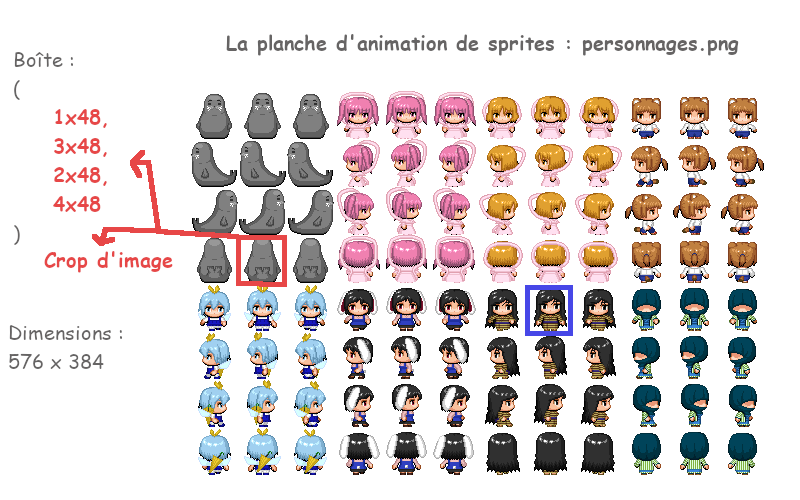

In [ ]:
def dessin_base64(planche: str, boite: tuple):
    planche_personnages = Image.open(planche)
    hero = planche_personnages.crop(boite)
    fichier_image = BytesIO()
    hero.save(fichier_image, format="png")
    image_bytes = fichier_image.getvalue()
    return "data:image/png;base64," + base64.b64encode(image_bytes).decode('ascii')

<img src="https://cdn.pixabay.com/photo/2012/04/12/13/26/question-30028_1280.png" width="30"> **La fonction ``dessiner_personnage`` permet de dessiner dans l'élément HTML de nom ``td`` dont l'identifiant est ``'cellule_a_b'``, avec ``a`` et ``b`` les coordonnées du personnage données par le dictionnaire ``dico_personnages``(objet renvoyé par la fonction ``personnages`` du script Python ``iceWalker_logique.py``), l'image du crop du personnage ``image_base64`` obtenu à l'aide de la fonction ``dessin_base64``. Si le paramètre ``tuile`` a pour valeur ``True``, on dessinera la glace sous le personnage.<br> Compléter la fonction ``dessiner_personnage``.**

In [ ]:
def dessiner_personnage(qui, image_base64, dico_personnages, tuile = True):
    element =  document.getElementById(f'cellule{...}_{...}')
    element.style.backgroundImage = f'url({...})'
    if tuile:
        element.style.backgroundImage =  ... + ',url(pictures/tuile.png)'

### <img src="https://www.pngmart.com/files/14/2-Number-Download-PNG-Image.png" width="25"> Le fichier ``index.html``

> **Lire avec beaucoup d'attention les commentaires donnés dans le code HTML ci-dessous.**

```html
<!DOCTYPE html>
<html lang="fr">
    <head>
        <title>iceWalker</title>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1">
        <link href="style.css" rel="stylesheet">
        <link rel="stylesheet" href="https://pyscript.net/latest/pyscript.css" />
        <!-- Source du code JavaScript qui permet d'exécuter du code Python dans une page HTML -->
        <script defer src="https://pyscript.net/latest/pyscript.js"></script>
        <py-config>
            packages = ["Pillow"] <!-- Bibliothèque Python de traitement de l'image -->
            [[fetch]]
            files = ["iceWalker_graphique.py", "iceWalker_logique.py"] <!-- les deux fichiers de script Python -->
            [[fetch]] <!-- On déclare les fichiers utiles en les rendant accessibles depuis la racine du projet -->
            from = "pictures/planches/"
            to_folder = "./"
            files = ["personnages.png", "poissons.png"]
            [[fetch]]
            from = "labyrinthes/"
            to_folder = "./"
            files = ["laby0.csv", "personnages0.csv", "dimensions0.csv"]   
            [[fetch]]    
            from = "pictures/" 
            to_folder = "./"
            files = ["fleches.png"]
        </py-config>
    </head>
    <body>
    <h1>Ice Walker Seal</h1>
    <!-- Nous allons depuis du code Python injecter la grille du jeu dans la balise div dont l'id est "plateau". -->
    <div id="plateauJeu"></div>

    <!-- 
      L'élément table d'identifiant "deplacer" permet de choisir la direction du phoque en cliquant sur l'élément td qui convient. 
      L'attribut py-click(Qui a le même rôle que l'attribut onclick) a pour valeur la fonction qui doit être exécutée 
      quand le joueur clique sur la flèche qui permet de déplacer le phoque dans la direction que cette dernière indique.-->      
    <table id="deplacer">
        <tr>
            <td></td>
            <td><img src="" id="haut" py-click="avancer('N')"></td>
            <td></td>
        </tr>
        <tr>
            <td><img src="" id="gauche"></td>
            <td><img src="" id="hero"></td>
            <td><img src="" id="droite"></td>
        </tr>
        <tr>
            <td></td>
            <td><img src="" id="bas"></td>
            <td></td>
        </tr>
    </table>
    <!-- Les trois balises ci-dessous permettent le débogage du code -->
    <div id="donnees"></div>
    <div id="personnages"></div>
    <div id="gagne"></div>

    <!-- Nous allons placer dans la balise py-script le code Python nécessaire au jeu -->
    <py-script>
        # Code Python du gamePlay du jeu Ice Walker Seal
    </py-script>    

    </body>
</html>
```

<img src="https://cdn.pixabay.com/photo/2012/04/12/13/26/question-30028_1280.png" width="30"> **Le joueur peut déplacer le phoque dans 4 directions**
+ **sud(bas) : 'S'**
+ **est(droite) : 'E'**
+ **nord(haut): 'N'**
+ **Ouest(gauche): 'O'**

Compléter les éléments HTML ``img`` avec le bon couple ``(attribut, valeur)`` pour permettre de déplacer la phoque en fonction du choix du joueur.



<img src="https://cdn.pixabay.com/photo/2012/04/12/13/26/question-30028_1280.png" width="30"> **Entre les balises ``<py-script> </py-script>`` nous allons réaliser le game play du jeu. Dans un premier temps il nous faut importer les fonctions que nous avons développées dans les scripts Python ``iceWalker_logique.py`` et ``iceWalker_graphique.py`` en plus de quelques fonctions utiles de bibliothèques permettant d'interagir avec le DOM.**
+ Importer tous les objets du fichier ``iceWalker_graphique.py``
+ Importer les objets ``document``, ``setInterval`` et ``clearInterval`` de la bibliothèque ``js``
+ Importer la fonction ``create_proxy`` de la bibliothèque ``pyodide.ffi``.
+ Importer tous les objets de la bibliothèque ``asyncio`` de façon à réserver un espace de noms à cette bibliothèque.



<img src="https://cdn.pixabay.com/photo/2012/04/12/13/26/question-30028_1280.png" width="30"> **Nous devons initialiser quelques variables**
+ ``hero_compteur`` et ``poisson_compteur`` sont initialisées à ``0`` (Ces variables vont intervenir dans l'animation des personnages).
+ Les variables ``personnages_csv``, ``labyrinthe_csv`` et ``dimensions_csv`` références les noms des fichiers CSV des données du jeu. Le choix des noms des varaibles n'ont pas été choisi par hasard.
+ Les variables ``planche_personnages``, ``planche_poisson`` et ``planche_fleches`` références les noms des fichiers png des planches de sprites utilisées dans le jeu.
+ ``vitesse_animation`` est initialisée à ``300``.
+ Il est laissé à ta perspicacité le choix d'initialiser les variables ``personnage_width``, ``personnage_height``, ``poisson_width``, ``poisson_height``, ``fleche_width`` et ``fleche_height``.


<img src="https://cdn.pixabay.com/photo/2012/04/12/13/26/question-30028_1280.png" width="30"> **Compléter le code manquant(``...``) et donner une explication pour chaque ligne d'instructions.**
```python
grille_iceWalker()
personnages = personnages(...)
dico_murs = labyrinthe(...) 
dimensions_labyrinthe = dimensions(...)
mur_enceinte()               
dessin_murs(...)
controle = True 
'''
La variable controle permet le contrôle d'un éventuel appuie intempestif 
sur les flèches de directions qui provoquerait, 
sans le traitement nécessaire, 
un comportement du glissement du phoque non souhaité. 
'''
```

<img src="https://cdn.pixabay.com/photo/2012/04/12/13/26/question-30028_1280.png" width="30"> **Il faut réaliser les crops des images pour réaliser le visuel du contrôle de direction du phoque, du phoque lui même au centre de la zone de contrôle. Il faut alors utiliser la fonction ``dessin_base64`` du script du fichier ``iceWalker_graphique.py``. Complèter le code ci-dessous.**

```python
hero = dessin_base64(planche_personnages, (personnage_width, 0, personnage_width*2, personnage_width))
haut = dessin_base64(planche_fleches, (..., ..., ..., ...))
droite = dessin_base64(...)
gauche = dessin_base64(...)
bas = dessin_base64(...)
```
Et donner à l'attribut ``src`` des éléments ``img`` la valeur du codage en base64 de l'image correspondante.

```python
document.getElementById("hero").src = hero
document.getElementById("haut").src = ...
document.getElementById(...).src = droite
document.getElementById(...). ... = gauche
... = bas
```

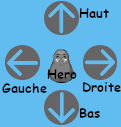



---



> **Dans le but d'améliorer le visuel du jeu, nous pouvons utiliser les sprites des planches d'animations pour réaliser des personnages en mouvement quand ils sont en attente d'une action du joueur.**

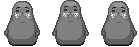

```python
def hero_animation_final():
      global hero_compteur
      hero = dessin_base64(planche_personnages,
            (personnage_width*hero_compteur,
            0,
            personnage_width*(hero_compteur + 1),
            personnage_height))                      
      dessiner_personnage('0', hero, personnages) 
      hero_compteur = (hero_compteur + 1) % 3
'''
Nous pouvons également faire réagir du code Python aux modifications du DOM.
Le navigateur Web ne peut pas gérer nativement les fonctions Python lorsqu'un 
événement tel qu'un clic sur un bouton se produit.
Pyodide permet de créer des proxys qui relient les fonctions Python et les rappels JavaScript. 
On create_proxy pour faire réagir le code Python.
'''
personnage_animation_proxy = create_proxy(hero_animation)

'''
On peut alors utiliser la fonction setInterval qui rappelle la fonction hero_animation 
tous les 300ms par l'intermédiaire de la fonction personnage_animation_proxy.
'''
hero_setInterval = setInterval(personnage_animation_proxy, vitesse_animation)
``` 

<img src="https://cdn.pixabay.com/photo/2012/04/12/13/26/question-30028_1280.png" width="30"> **Compléter le code ci-dessous pour réaliser une animation du poisson qui est la cible à atteindre par le phoque.**

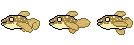

In [ ]:
def poisson_animation():
            global poisson_compteur
            poisson = dessin_base64(..., (...))         
            dessiner_personnage(...) 
            poisson_compteur = ...

poisson_animation_proxy = create_proxy(...)
poisson_setInterval = setInterval(..., ...)

<img src="https://cdn.pixabay.com/photo/2012/04/12/13/26/question-30028_1280.png" width="30"> **Finalement nous allons créer une fonction ``avancer(direction = 'S', vitesse = 0.3)`` qui permet de mettre à jour la position du phoque dans dictionnaire ``personnages`` et créer le mouvement de glisse. Compléter le code de la fonction ``avancer``.**

> ``async | await`` : [**Coroutines et tâches**](https://docs.python.org/fr/3.7/library/asyncio-task.html)

In [ ]:
async def avancer(direction='S', vitesse = 0.3): 
                global hero_setInterval, controle, poisson_setInterval     
                glisser = ...                
                if controle: 
                    clearInterval(hero_setInterval) #L'animation est arrêtée                                    
                    while glisser :
                        # On bloque l'action des flèches de direction.
                        controle = ... 
                        await asyncio.sleep(vitesse)
                        # Mise à jour de la cellule précédent où se trouvait la phoque(On ne dessine que la tuile)                                               
                        cellule_precedente =  document.getElementById(...)
                        cellule_precedente.style.backgroundImage = f'url(pictures/tuile.png)'
                        # Le personnage peut-il glisser dans la direction choisie?                                      
                        glisser = mouvement(..., ..., ..., ...)
                        # Quelque soit la posibilité ou non de glisser on dessine le phoque dans la position cohérente.
                        # dans la case où il se trouve(Peut-être la même case que celle référencée par cellule_precedente)
                        if direction == 'S':
                            hero = dessin_base64(planche_personnages, (personnage_width, 0, personnage_width*2, personnage_height))
                        elif direction == 'O':
                            hero = dessin_base64(..., (...))
                        elif direction == 'E':
                            hero = dessin_base64(..., (...))
                        elif direction == 'N':
                            hero = dessin_base64(..., (...))
                    # le personnage à terminé de glissé, on redémarre l'animation.                                                                  
                    hero_setInterval = setInterval(personnage_animation_proxy, vitesse_animation)
                # On permet à nouveau les actions sur les flèches de direction.
                controle = True
                # On contrôle si le phoque est sur la case du poisson.
                if ...:
                    # On arrête les contrôle sur les flèches de direction
                    controle = ...
                    # On arrête l'animation du poisson.
                    ....



---



---



---



## <img src="https://cdn.pixabay.com/photo/2015/12/07/21/52/harbor-1081482_960_720.png" width="60"> **<u>Le résultat final</u>**

In [1]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/FJjQ5aPQRiU" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>')

C:\Users\tsaut\AppData\Roaming\Python\Python311\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")




---



---



---



**Les flêches de direction**

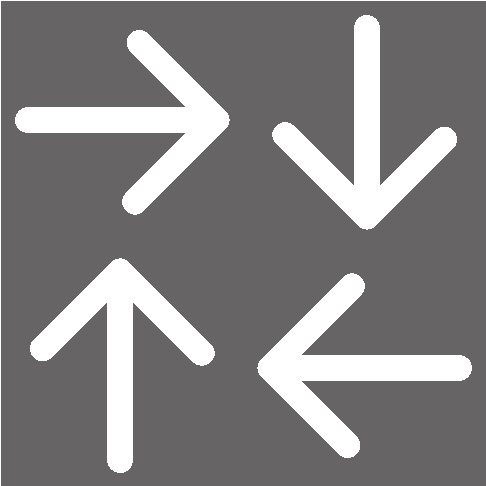

**La planche des poissons**

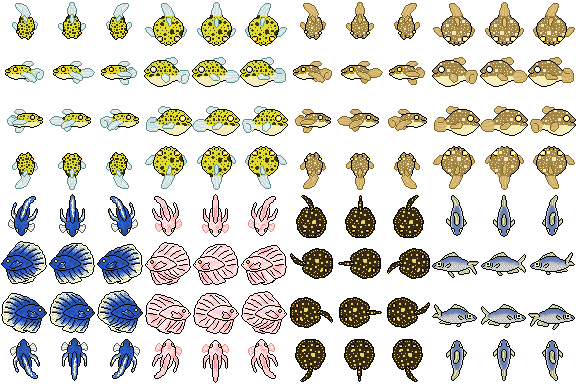

**La planche du personnage principal**

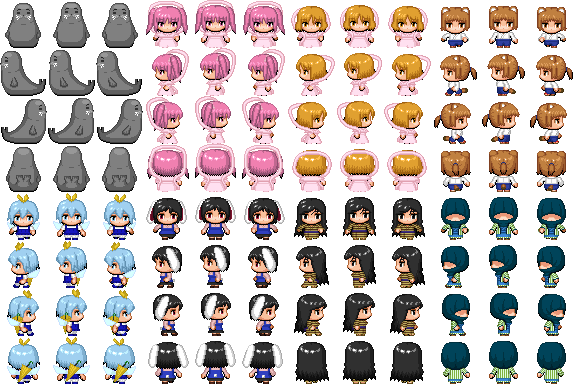

**La tuile de glace**

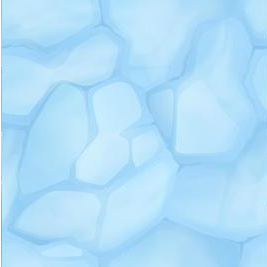